#1.Project Title
#FundForecast Pro: A Machine Learning Framework for Predicting Startup Break-Even Points and Fundraising Strategies

Rows:  2000 Columns:  18
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   company_name           2000 non-null   object 
 1   industry               2000 non-null   object 
 2   location               2000 non-null   object 
 3   employees              2000 non-null   int64  
 4   years_since_founding   2000 non-null   float64
 5   prior_funding_rounds   2000 non-null   int64  
 6   total_funding          2000 non-null   int64  
 7   monthly_burn_rate      2000 non-null   float64
 8   monthly_revenue        2000 non-null   float64
 9   market_size_category   2000 non-null   object 
 10  business_stage         2000 non-null   object 
 11  has_technical_founder  2000 non-null   bool   
 12  net_monthly_cash_flow  2000 non-null   float64
 13  runway_months          2000 non-null   float64
 14  burn_to_revenue_ratio  2000 non

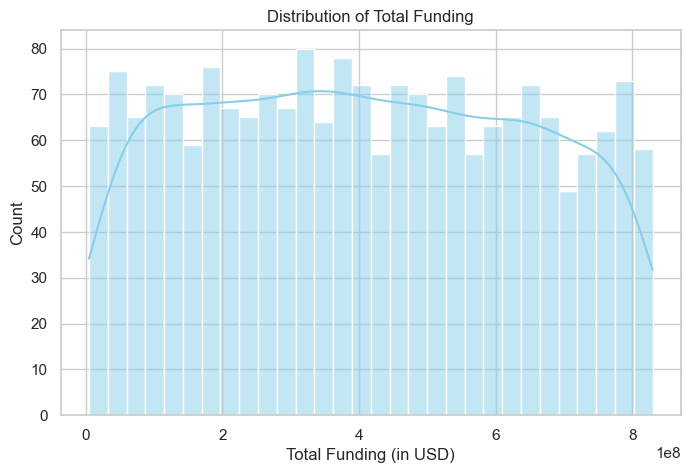

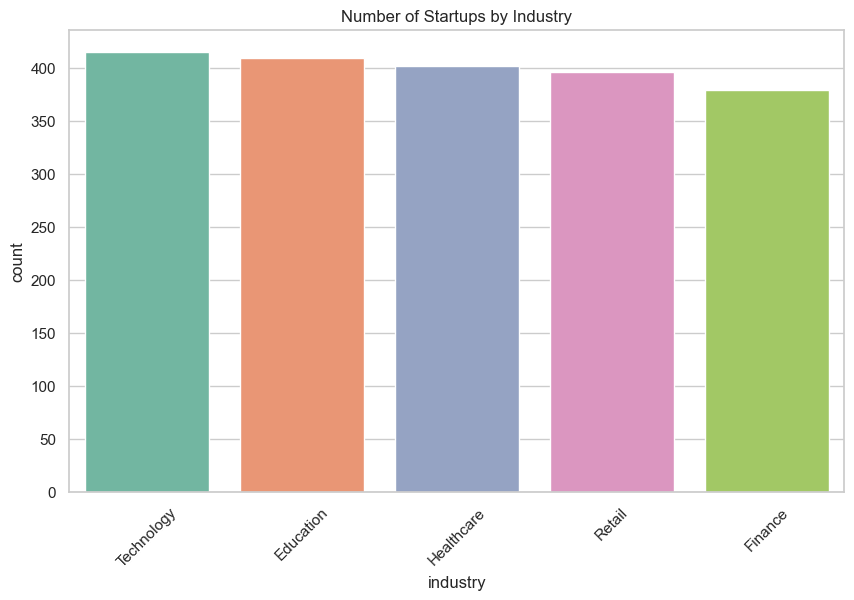

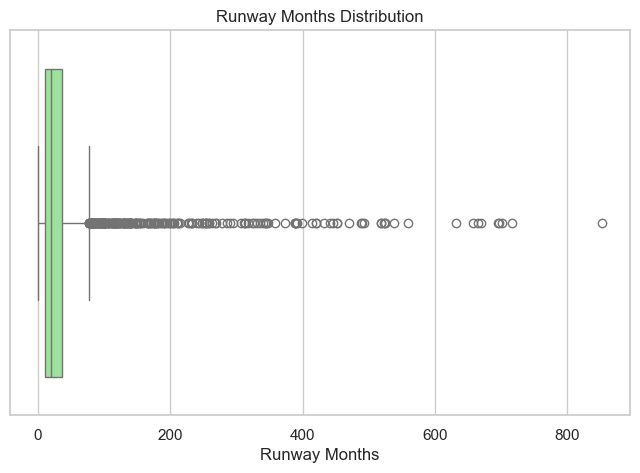

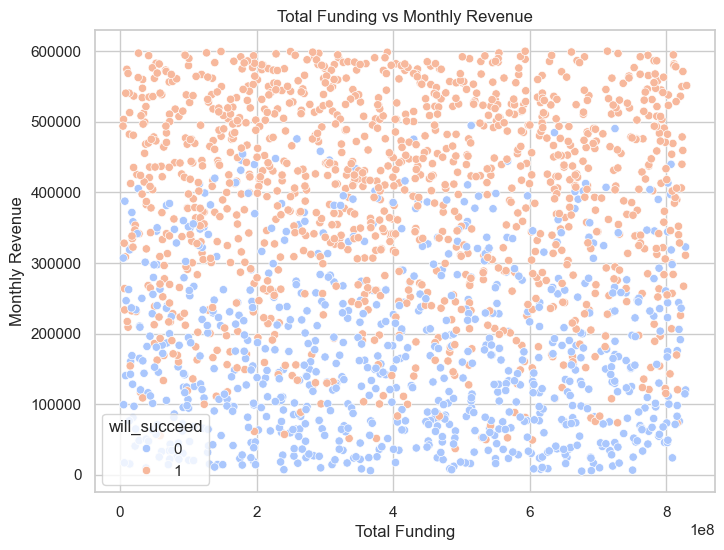

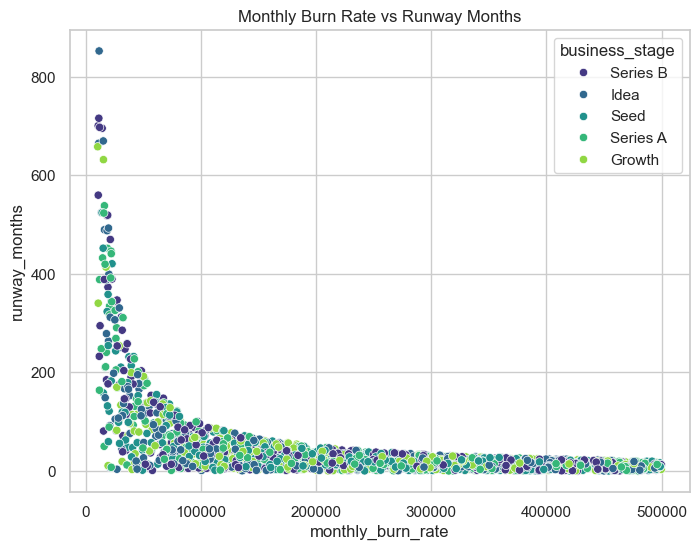

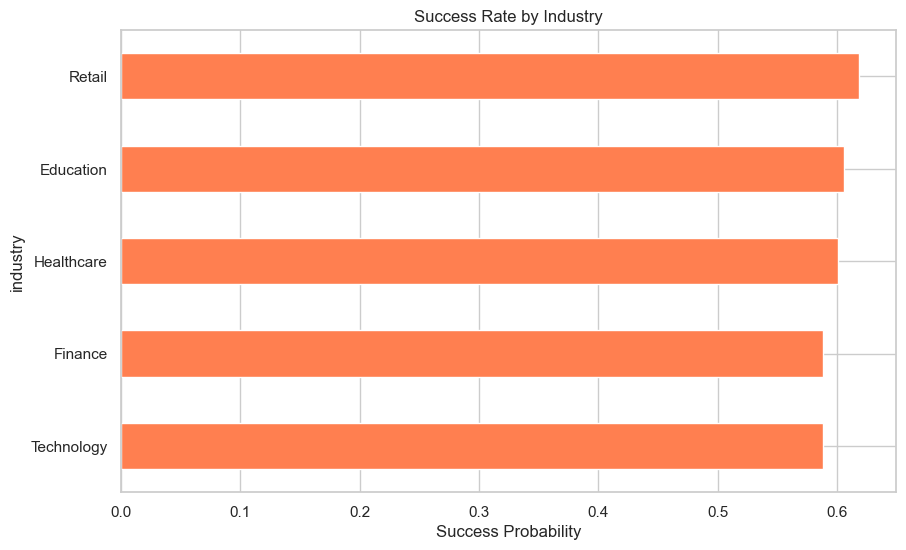

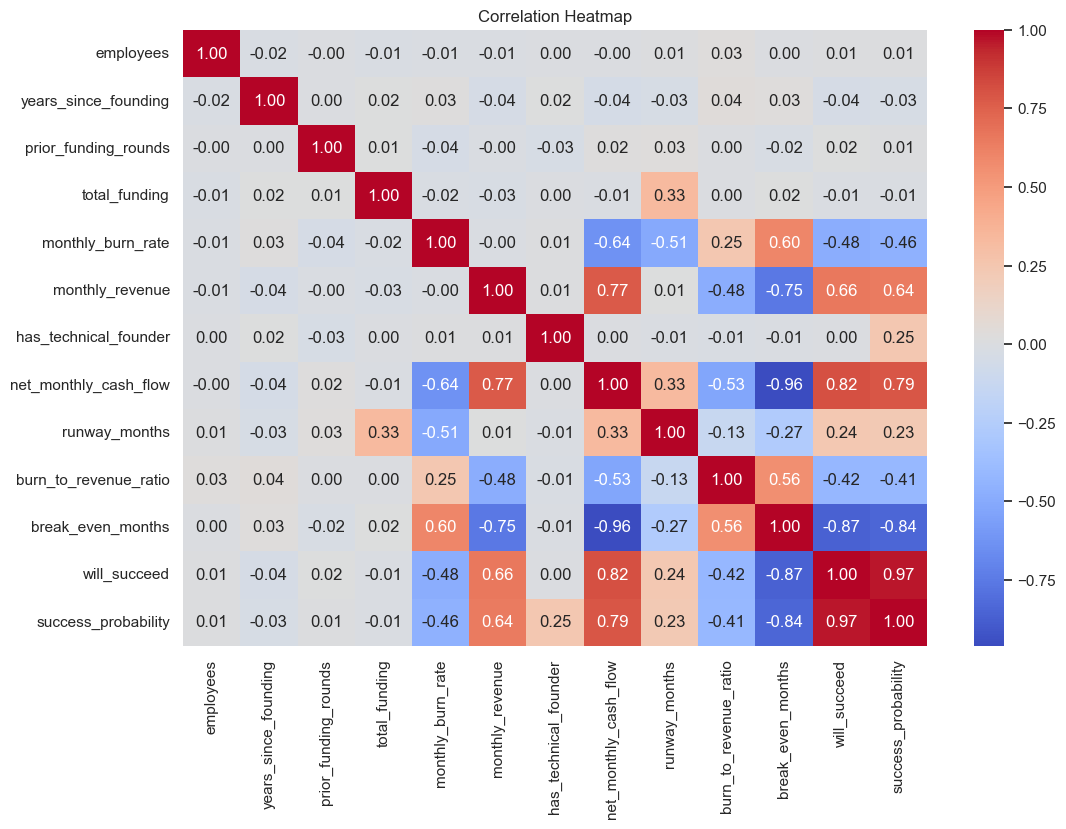

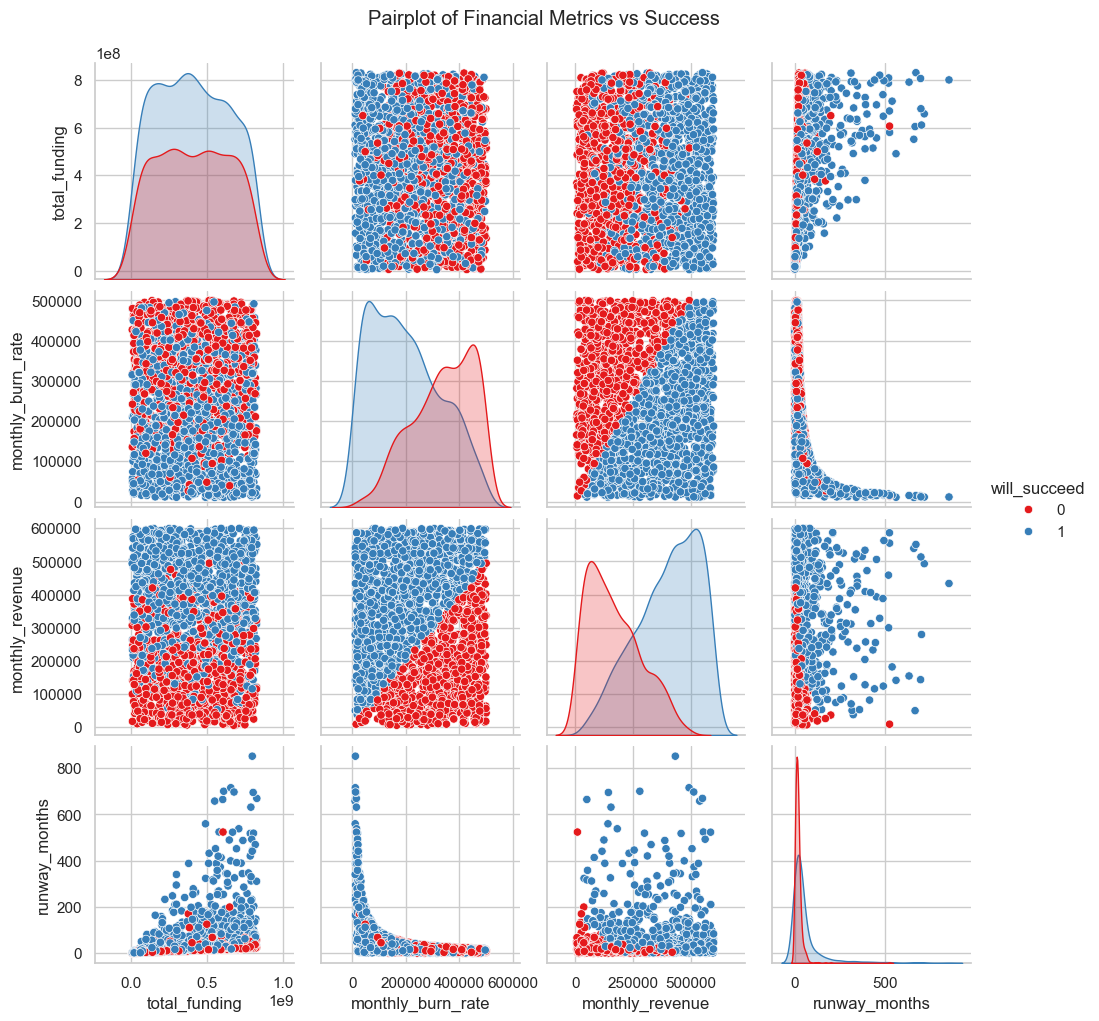

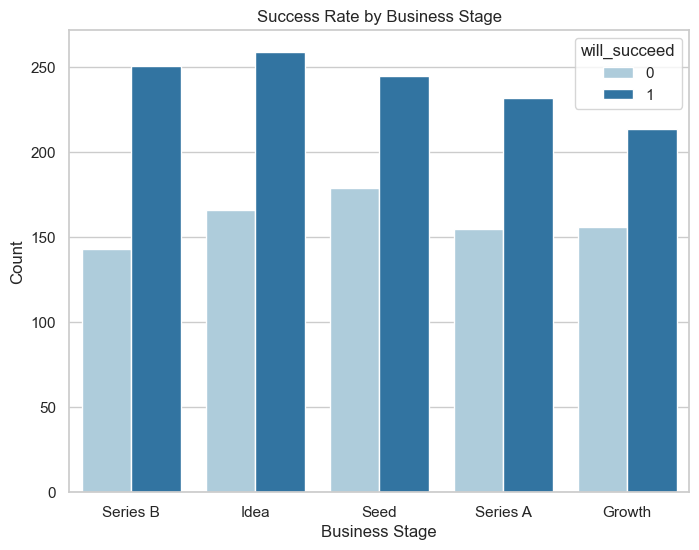

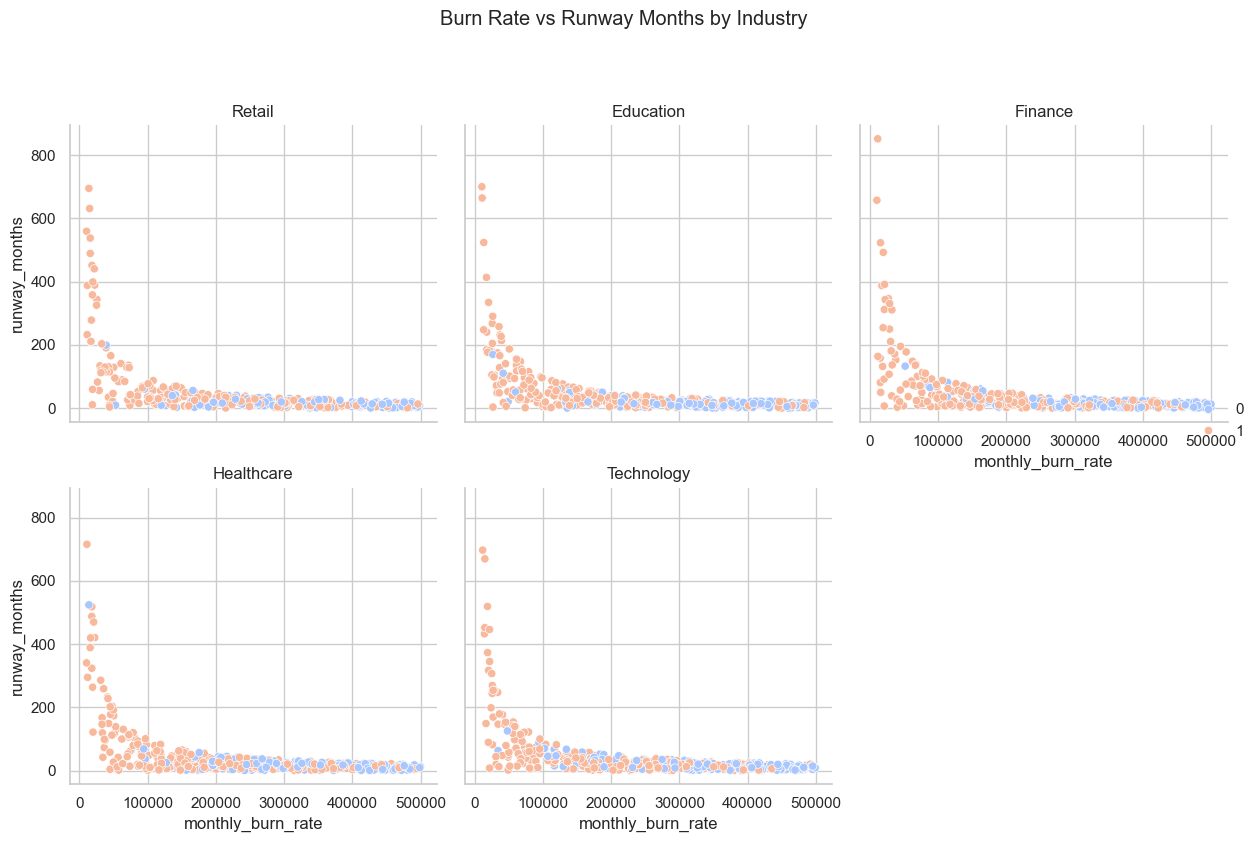

In [6]:
## **4.Exploratory Data Analysis (EDA)**

### **i. Importing required Libraries**

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

### **ii. Load the Dataset**

startup_data=pd.read_csv("C:/Users/Sanika\Downloads/indian_startup_data_totalfunding_inr_only1111111111111111.csv")

### **iii.  Initial Data Overview**

#Display the first few rows
startup_data.head()

#Check the shape of data
print("Rows: ",startup_data.shape[0],"Columns: ",startup_data.shape[1])

startup_data['will_succeed'].value_counts(normalize=True)

#Review datatypes and non-null counts
startup_data.info()

### **iv.  Summary Statistics**

#Descriptive Statistic for numerical columns
startup_data.describe().T

#Counts and unique for Categorical columns
for col in ['industry', 'location','business_stage']:
    unique_count = startup_data[col].nunique()
    print(f"Column '{col}' has {unique_count} unique values")


# Proportion (percentage) distribution for categorical columns
print("\n--- Distribution of Categorical Features ---\n")
for col in ['industry', 'location', 'business_stage', 'has_technical_founder', 'will_succeed']:
    print(f"\n{col} distribution (%):")
    print(startup_data[col].value_counts(normalize=True) * 100)

# Example: Top 5 industries by count
startup_data['industry'].value_counts().head()

### **v. Missing value Analysis**

#Check missing values
startup_data.isnull().sum()

### **vi. Grouped Insights**

# Average break-even months by industry
startup_data.groupby('industry')['break_even_months'].mean()

# Count of startups that succeeded in each industry
startup_data.groupby('industry')['will_succeed'].value_counts()

# Total funding by location
startup_data.groupby('location')['total_funding'].sum()

# Pivot table: average revenue and average burn rate by industry and location
startup_data.pivot_table(
    index='industry',
    columns='location',
    values=['monthly_revenue', 'monthly_burn_rate'],
    aggfunc='mean'
)

# Success rate by industry
startup_data.pivot_table(
    index='industry',
    values='will_succeed',
    aggfunc='mean'
)

### **vi. Visualization**

#####**Univariate Visualizations**

###### **1.1 Distribution of total_funding**

plt.figure(figsize=(8,5))
sns.histplot(startup_data['total_funding'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Total Funding')
plt.xlabel('Total Funding (in USD)')
plt.ylabel('Count')
plt.show()


 #**Insights**



###### **1.2 Count of Startups by industry**

plt.figure(figsize=(10,6))
sns.countplot(data=startup_data, x='industry', order=startup_data['industry'].value_counts().index, palette='Set2')
plt.title('Number of Startups by Industry')
plt.xticks(rotation=45)
plt.show()


 #**Insights**



###### **1.3 Distribution of runway_months**

plt.figure(figsize=(8,5))
sns.boxplot(x=startup_data['runway_months'], color='lightgreen')
plt.title('Runway Months Distribution')
plt.xlabel('Runway Months')
plt.show()

#**Insight**



#**Insight**

#####**Bivariate Visualizations**

###### **2.1 Funding vs Revenue**

plt.figure(figsize=(8,6))
sns.scatterplot(data=startup_data, x='total_funding', y='monthly_revenue', hue='will_succeed', palette='coolwarm')
plt.title('Total Funding vs Monthly Revenue')
plt.xlabel('Total Funding')
plt.ylabel('Monthly Revenue')
plt.show()


#**Insight**



###### **2.2 Burn Rate vs Runway Months**

plt.figure(figsize=(8,6))
sns.scatterplot(data=startup_data, x='monthly_burn_rate', y='runway_months', hue='business_stage', palette='viridis')
plt.title('Monthly Burn Rate vs Runway Months')
plt.show()

#**Insight**



###### **2.3 Average Success Rate by Industry**

industry_success = startup_data.groupby('industry')['will_succeed'].mean().sort_values()
plt.figure(figsize=(10,6))
industry_success.plot(kind='barh', color='coral')
plt.title('Success Rate by Industry')
plt.xlabel('Success Probability')
plt.show()


#**Insights**



#####**Multivariate Visualizations**

###### **1. Heatmap – Correlation Between All Numerical Features**

plt.figure(figsize=(12,8))
sns.heatmap(startup_data.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


#**Insight**



###### **2. Pairplot – Relationship Across Key Features Colored by Success**

sns.pairplot(startup_data[['total_funding', 'monthly_burn_rate', 'monthly_revenue', 'runway_months', 'will_succeed']],
             hue='will_succeed', palette='Set1')
plt.suptitle('Pairplot of Financial Metrics vs Success', y=1.02)
plt.show()


#**Insight**



###### **3.Countplot: Business Stage vs Success**

plt.figure(figsize=(8,6))
sns.countplot(data=startup_data, x='business_stage', hue='will_succeed', palette='Paired')
plt.title('Success Rate by Business Stage')
plt.xlabel('Business Stage')
plt.ylabel('Count')
plt.show()


#**Insights**



###### **4. FacetGrid – Burn Rate vs Runway by Industry**

g = sns.FacetGrid(startup_data, col='industry', col_wrap=3, height=4)
g.map_dataframe(sns.scatterplot, x='monthly_burn_rate', y='runway_months', hue='will_succeed', palette='coolwarm')
g.add_legend()
g.set_titles(col_template="{col_name}")
plt.suptitle("Burn Rate vs Runway Months by Industry", y=1.05)
plt.tight_layout()
plt.show()


#**Insight**



In [ ]:
Step 5: Data Preprocessing & Feature Engineering
5.1 Check & Handle Missing Values

In [7]:
# Check percentage of missing values
missing_percent = startup_data.isnull().mean() * 100
print(missing_percent[missing_percent > 0])

# Example: If missing values are small, drop rows with missing values
startup_data_clean = startup_data.dropna()

# Alternatively, fill missing numeric values with median or mean
# startup_data['monthly_revenue'].fillna(startup_data['monthly_revenue'].median(), inplace=True)


Series([], dtype: float64)


In [ ]:
5.2 Encode Categorical Variables

In [8]:
from sklearn.preprocessing import LabelEncoder

categorical_cols = ['industry', 'location', 'market_size_category', 'business_stage']
le_dict = {}

for col in categorical_cols:
    le = LabelEncoder()
    startup_data_clean[col] = le.fit_transform(startup_data_clean[col])
    le_dict[col] = le  # save encoder if needed later (for new data)

# Convert boolean 'has_technical_founder' to int if not already
startup_data_clean['has_technical_founder'] = startup_data_clean['has_technical_founder'].astype(int)

# Now check the dtypes again
print(startup_data_clean.dtypes)


company_name              object
industry                   int64
location                   int64
employees                  int64
years_since_founding     float64
prior_funding_rounds       int64
total_funding              int64
monthly_burn_rate        float64
monthly_revenue          float64
market_size_category       int64
business_stage             int64
has_technical_founder      int64
net_monthly_cash_flow    float64
runway_months            float64
burn_to_revenue_ratio    float64
break_even_months          int64
will_succeed               int64
success_probability      float64
dtype: object


In [ ]:
5.3 Feature Engineering (if applicable)

In [9]:
startup_data_clean['funding_per_employee'] = startup_data_clean['total_funding'] / (startup_data_clean['employees'] + 1)
startup_data_clean['rev_burn_ratio'] = startup_data_clean['monthly_revenue'] / (startup_data_clean['monthly_burn_rate'] + 1)


In [11]:
features = [
    'industry', 'location', 'employees', 'years_since_founding', 'prior_funding_rounds',
    'total_funding', 'monthly_burn_rate', 'monthly_revenue', 'market_size_category',
    'business_stage', 'has_technical_founder',
    'funding_per_employee', 'rev_burn_ratio' # newly engineered features
]

X = startup_data_clean[features]
print(X)

      industry  location  employees  years_since_founding  \
0            3         8         57                   7.4   
1            0         6        188                   5.2   
2            1         9         86                   6.5   
3            0         1          3                   7.5   
4            0         8        190                   6.3   
...        ...       ...        ...                   ...   
1995         4         0         36                   4.1   
1996         0         8         54                   9.6   
1997         4         1         27                   8.8   
1998         0         2         15                   7.2   
1999         1         0        119                   7.3   

      prior_funding_rounds  total_funding  monthly_burn_rate  monthly_revenue  \
0                        2      464890719          212208.27        454862.61   
1                        3      202686083          135657.57         63380.73   
2                       

In [ ]:
Step 6: Model Training (you can do this next)

In [ ]:
Step 6: Model Training & Evaluation
6A. Regression: Predicting break_even_months

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Define features and target for regression
regression_target = 'break_even_months'
X = startup_data_clean[features]
y_reg = startup_data_clean[regression_target]

# Train/test split
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(
    X, y_reg, test_size=0.2, random_state=42
)

# Train Random Forest Regressor
regressor = RandomForestRegressor(random_state=42)
regressor.fit(X_train_reg, y_train_reg)

# Predictions and metrics
y_pred_reg = regressor.predict(X_test_reg)
mae = mean_absolute_error(y_test_reg, y_pred_reg)
rmse = np.sqrt(mean_squared_error(y_test_reg, y_pred_reg))
r2 = r2_score(y_test_reg, y_pred_reg)

print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R2 Score: {r2:.2f}")


MAE: 0.45
RMSE: 0.68
R2 Score: 1.00


In [ ]:
6B. Classification: Predicting will_succee

Accuracy: 99.75%
Precision: 100.00%
Recall: 99.58%
F1-score: 99.79%

Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      1.00       160
           1       1.00      1.00      1.00       240

    accuracy                           1.00       400
   macro avg       1.00      1.00      1.00       400
weighted avg       1.00      1.00      1.00       400



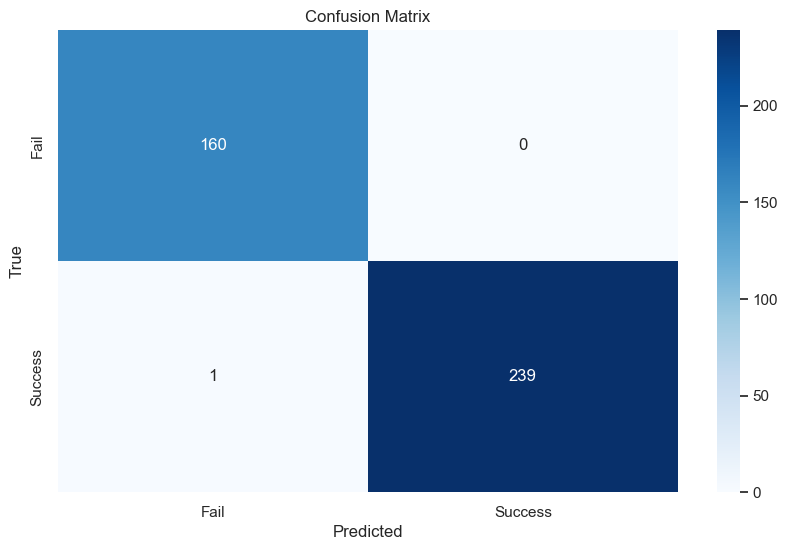

In [13]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Target for classification
classification_target = 'will_succeed'
y_clf = startup_data_clean[classification_target]

# Train/test split
X_train_clf, X_test_clf, y_train_clf, y_test_clf = train_test_split(
    X, y_clf, test_size=0.2, random_state=42, stratify=y_clf
)

# Train Random Forest Classifier
classifier = RandomForestClassifier(random_state=42)
classifier.fit(X_train_clf, y_train_clf)

# Predictions
y_pred_clf = classifier.predict(X_test_clf)

# Metrics
accuracy = accuracy_score(y_test_clf, y_pred_clf)
precision = precision_score(y_test_clf, y_pred_clf)
recall = recall_score(y_test_clf, y_pred_clf)
f1 = f1_score(y_test_clf, y_pred_clf)

print(f"Accuracy: {accuracy:.2%}")
print(f"Precision: {precision:.2%}")
print(f"Recall: {recall:.2%}")
print(f"F1-score: {f1:.2%}")

# Classification report
print("\nClassification Report:\n", classification_report(y_test_clf, y_pred_clf))

# Confusion matrix
cm = confusion_matrix(y_test_clf, y_pred_clf)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Fail', 'Success'], yticklabels=['Fail', 'Success'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
6C: (Optional) Try XGBoost for Comparison

In [18]:
!pip install xgboost

   ---------------------------------------- 0.0/149.9 MB ? eta -:--:--
   ---------------------------------------- 0.8/149.9 MB 4.6 MB/s eta 0:00:33
    --------------------------------------- 2.1/149.9 MB 5.1 MB/s eta 0:00:29
    --------------------------------------- 3.1/149.9 MB 5.2 MB/s eta 0:00:29
   - -------------------------------------- 4.5/149.9 MB 5.2 MB/s eta 0:00:28
   - -------------------------------------- 5.5/149.9 MB 5.2 MB/s eta 0:00:28
   - -------------------------------------- 6.6/149.9 MB 5.2 MB/s eta 0:00:28
   - -------------------------------------- 7.3/149.9 MB 5.1 MB/s eta 0:00:29
   -- ------------------------------------- 8.4/149.9 MB 5.0 MB/s eta 0:00:29
   -- ------------------------------------- 9.4/149.9 MB 4.9 MB/s eta 0:00:29
   -- ------------------------------------- 10.5/149.9 MB 4.9 MB/s eta 0:00:29
   --- ------------------------------------ 11.5/149.9 MB 4.9 MB/s eta 0:00:29
   --- ------------------------------------ 12.3/149.9 MB 4.9 MB/s et

In [20]:


from xgboost import XGBRegressor, XGBClassifier

# Regression
xgb_reg = XGBRegressor(random_state=42)
xgb_reg.fit(X_train_reg, y_train_reg)
y_pred_xgb_reg = xgb_reg.predict(X_test_reg)

# Classification
xgb_clf = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
xgb_clf.fit(X_train_clf, y_train_clf)
y_pred_xgb_clf = xgb_clf.predict(X_test_clf)


In [21]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

mae = mean_absolute_error(y_test_reg, y_pred_xgb_reg)
mse = mean_squared_error(y_test_reg, y_pred_xgb_reg)
rmse = np.sqrt(mse)
r2 = r2_score(y_test_reg, y_pred_xgb_reg)

print(f"XGBoost Regression MAE: {mae:.2f}")
print(f"XGBoost Regression RMSE: {rmse:.2f}")
print(f"XGBoost Regression R2 Score: {r2:.2f}")


XGBoost Regression MAE: 0.52
XGBoost Regression RMSE: 0.74
XGBoost Regression R2 Score: 1.00


In [ ]:
For Classification (will_succeed):

XGBoost Classification Accuracy: 100.00%
XGBoost Classification Precision: 100.00%
XGBoost Classification Recall: 100.00%
XGBoost Classification F1-score: 100.00%

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       160
           1       1.00      1.00      1.00       240

    accuracy                           1.00       400
   macro avg       1.00      1.00      1.00       400
weighted avg       1.00      1.00      1.00       400



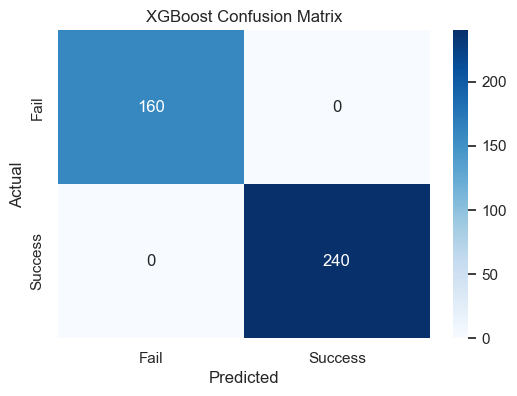

In [22]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

accuracy = accuracy_score(y_test_clf, y_pred_xgb_clf)
precision = precision_score(y_test_clf, y_pred_xgb_clf)
recall = recall_score(y_test_clf, y_pred_xgb_clf)
f1 = f1_score(y_test_clf, y_pred_xgb_clf)

print(f"XGBoost Classification Accuracy: {accuracy:.2%}")
print(f"XGBoost Classification Precision: {precision:.2%}")
print(f"XGBoost Classification Recall: {recall:.2%}")
print(f"XGBoost Classification F1-score: {f1:.2%}")

print("\nClassification Report:\n", classification_report(y_test_clf, y_pred_xgb_clf))

# Confusion matrix visualization
cm = confusion_matrix(y_test_clf, y_pred_xgb_clf)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Fail', 'Success'], 
            yticklabels=['Fail', 'Success'])
plt.title("XGBoost Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [ ]:
2. Model Explainability with SHAP (Optional but Recommended)

In [24]:
!pip install shap

   ---------------------------------------- 0.0/545.1 kB ? eta -:--:--
   ---------------------------------------- 545.1/545.1 kB 2.8 MB/s eta 0:00:00

   -------------------- ------------------- 1/2 [shap]
   -------------------- ------------------- 1/2 [shap]
   -------------------- ------------------- 1/2 [shap]
   -------------------- ------------------- 1/2 [shap]
   -------------------- ------------------- 1/2 [shap]
   ---------------------------------------- 2/2 [shap]



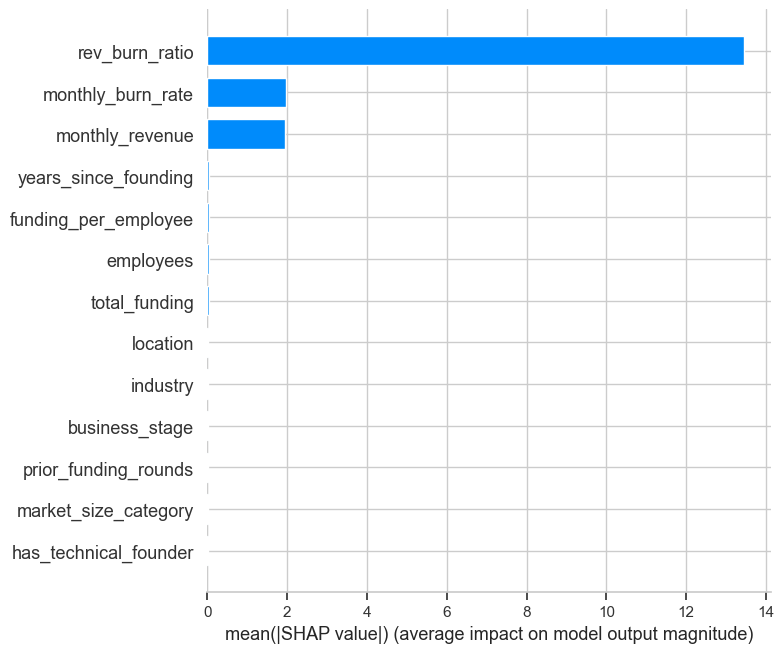

In [25]:
import shap

# For regression
explainer_reg = shap.TreeExplainer(xgb_reg)
shap_values_reg = explainer_reg.shap_values(X_test_reg)
shap.summary_plot(shap_values_reg, X_test_reg, plot_type='bar')



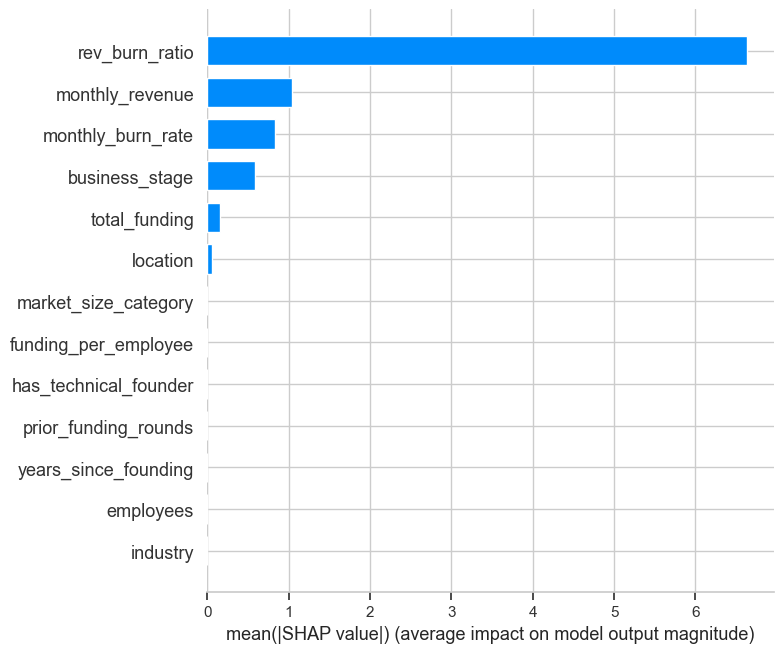

In [28]:
# For classification
explainer_clf = shap.TreeExplainer(xgb_clf)
shap_values_clf = explainer_clf.shap_values(X_test_clf)
shap.summary_plot(shap_values_clf, X_test_clf, plot_type='bar')  # Class 1 (success)


In [31]:
import joblib

joblib.dump(xgb_reg, 'xgb_regressor_model.pkl')



['xgb_regressor_model.pkl']

In [32]:
joblib.dump(xgb_clf, 'xgb_classifier_model.pkl')

['xgb_classifier_model.pkl']

In [33]:
xgb_reg_loaded = joblib.load('xgb_regressor_model.pkl')

In [34]:
xgb_clf_loaded = joblib.load('xgb_classifier_model.pkl')

In [35]:
import joblib

joblib.dump(le_dict, 'label_encoders.pkl')     # your categorical encoders if needed


['label_encoders.pkl']

In [36]:
joblib.dump(xgb_reg, 'xgb_reg_model.pkl')      # regression

['xgb_reg_model.pkl']

In [37]:
joblib.dump(xgb_clf, 'xgb_clf_model.pkl')      # classification

['xgb_clf_model.pkl']

In [38]:
import streamlit as st
import numpy as np
import pandas as pd
import joblib
import shap

# --- Load Models and Encoders ---
xgb_reg = joblib.load('xgb_reg_model.pkl')   # Regression model
xgb_clf = joblib.load('xgb_clf_model.pkl')   # Classification model
le_dict = joblib.load('label_encoders.pkl')  # LabelEncoders used in training

# --- User Input ---
st.title("FundForecast Pro: Startup Break-Even & Success Predictor")
st.write("Enter your startup details and get predictions & explanations!")

# Example input fields (Edit with your feature names and categories)
industry = st.selectbox("Industry", list(le_dict['industry'].classes_))
location = st.selectbox("Location", list(le_dict['location'].classes_))
employees = st.number_input("Employees", 1, 500, 10)
years_since_founding = st.number_input("Years Since Founding", 0, 20, 2)
prior_funding_rounds = st.number_input("Prior Funding Rounds", 0, 10, 2)
total_funding = st.number_input("Total Funding (INR)", 100000, 1000000000, 5000000, step=100000)
monthly_burn_rate = st.number_input("Monthly Burn Rate (INR)", 10000, 10000000, 150000)
monthly_revenue = st.number_input("Monthly Revenue (INR)", 0, 10000000, 100000)
market_size_category = st.selectbox("Market Size Category", list(le_dict['market_size_category'].classes_))
business_stage = st.selectbox("Business Stage", list(le_dict['business_stage'].classes_))
has_technical_founder = st.radio("Technical Founder?", ('Yes', 'No'))

if st.button("Predict"):
    # --- Encode Categorical Variables ---
    input_data = {
        'industry': le_dict['industry'].transform([industry])[0],
        'location': le_dict['location'].transform([location])[0],
        'employees': employees,
        'years_since_founding': years_since_founding,
        'prior_funding_rounds': prior_funding_rounds,
        'total_funding': total_funding,
        'monthly_burn_rate': monthly_burn_rate,
        'monthly_revenue': monthly_revenue,
        'market_size_category': le_dict['market_size_category'].transform([market_size_category])[0],
        'business_stage': le_dict['business_stage'].transform([business_stage])[0],
        'has_technical_founder': 1 if has_technical_founder == "Yes" else 0
    }
    # Feature engineering (add engineered features if used in model)
    input_data['funding_per_employee'] = total_funding / (employees + 1)
    input_data['rev_burn_ratio'] = monthly_revenue / (monthly_burn_rate + 1)

    input_df = pd.DataFrame([input_data])

    ## --- Regression Prediction ---
    predicted_break_even = xgb_reg.predict(input_df)[0]

    ## --- Classification Prediction ---
    predicted_success_prob = xgb_clf.predict_proba(input_df)[0,1]  # Probability for class "Success"

    ## --- Results Output ---
    st.success(f"Predicted Break-Even Point: **{predicted_break_even:.1f} months**")
    st.info(f"Success Probability: **{predicted_success_prob*100:.1f}%**")

    # --- SHAP Explainability ---
    st.subheader("Feature Importance (SHAP Explanation)")

    explainer = shap.TreeExplainer(xgb_reg)  # Regression explainer, swap to xgb_clf for classification
    shap_values = explainer.shap_values(input_df)
    # Display SHAP values as a simple bar chart in Streamlit
    shap.summary_plot(shap_values, input_df, plot_type="bar", show=False)
    st.pyplot(bbox_inches='tight')

    st.caption("This plot shows which factors most strongly pushed your break-even prediction up or down.")

st.caption("For demo purposes. All inputs are confidential. Developed with ❤️ using Streamlit.")



2025-08-06 07:20:12.253 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-06 07:20:12.631 
  command:

    streamlit run C:\Users\Sanika\anaconda3\Lib\site-packages\ipykernel_launcher.py [ARGUMENTS]
2025-08-06 07:20:12.633 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-06 07:20:12.635 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-06 07:20:12.638 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-06 07:20:12.639 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-06 07:20:12.640 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-06 07:20:12.641 Thread 'MainThread': m

DeltaGenerator()

In [40]:
streamlit run app.py


SyntaxError: invalid syntax (507122745.py, line 1)